https://www.ailab.ics.keio.ac.jp/b4_induction_training/docs/dl/mnist_notebook.html

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [47]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 正規化
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

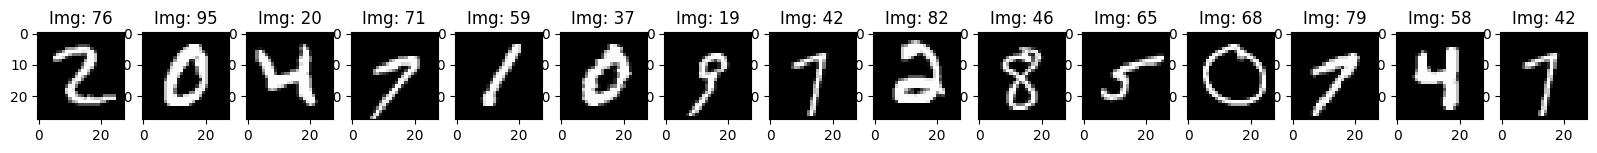

In [48]:
fig, axs = plt.subplots(1, 15, figsize=(20, 3))
for i, ax in zip(np.random.randint(1, 100, 15), axs):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f'Img: {i}')

In [49]:
model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input"),
    # tf.keras.layers.Input(shape=(28, 28), name='input'),
    # tf.keras.layers.Flatten(),
    
    # Layer1: Linear mapping: (None, 784) -> (None, 512)
    tf.keras.layers.Dense(512, name="fc_1"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_1"),
    
    # Layer2: Linear mapping: (None, 512) -> (None, 256)
    tf.keras.layers.Dense(256, name="fc_2"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_2"),
    
    # Layer3: Linear mapping: (None, 256) -> (None, 256)
    tf.keras.layers.Dense(256, name="fc_3"),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name="relu_3"),
    
    # Layer4: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name="dense_3"),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name="softmax"),
])
# model.summary()

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_3 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compiling
# Set model & training information into machine memory (CPU or GPU)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
# Set callback functions which are called during model training
CSV_FILE_PATH = 'tensorflow_test_02.csv'
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

# Train model
history = model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8862 - loss: 0.4000 - val_accuracy: 0.9652 - val_loss: 0.1083
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9722 - loss: 0.0866 - val_accuracy: 0.9717 - val_loss: 0.0860
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9832 - loss: 0.0523 - val_accuracy: 0.9810 - val_loss: 0.0630
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9878 - loss: 0.0386 - val_accuracy: 0.9694 - val_loss: 0.0993
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9787 - val_loss: 0.0761
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9743 - val_loss: 0.0951
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9922 - loss: 0.0226 - val_accuracy: 0.9764 - val_loss: 0.0941
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9919 - loss: 0.0245 - val_acc

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.1297


(0.10392772406339645, 0.9817000031471252)

In [61]:
# Model evaluation
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

loss(train): 0.002698
accuracy(train): 0.9992

loss(test): 0.1039
accuracy(test): 0.9817


In [66]:
df = pd.read_csv(CSV_FILE_PATH)
df.head(3)

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.936200,0.217378,0.9652,0.108320
1,1,0.972450,0.085661,0.9717,0.086026
2,2,0.982433,0.055809,0.9810,0.062996


In [97]:
predictions = model.predict(x_test, verbose=0)
df_pred = pd.DataFrame(predictions)
df_pred.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.217576e-14,8.287250e-14,1.165361e-10,9.919855e-12,4.842748e-11,5.256359e-16,3.033094e-18,1.000000e+00,5.886804e-14,4.021712e-09
1,3.733877e-16,4.073952e-15,1.000000e+00,6.207202e-15,1.426826e-17,9.770385e-19,2.397638e-17,4.423768e-15,1.017248e-17,1.119356e-18
2,4.914740e-16,1.000000e+00,1.608507e-10,1.910492e-17,3.395710e-12,7.818469e-14,1.293621e-10,2.015517e-12,2.151513e-14,7.096961e-16


In [57]:
epochs = df["epoch"].values
train_acc = df['accuracy'].values
train_loss = df["loss"].values
test_acc = df['val_accuracy'].values
test_loss = df["val_loss"].values

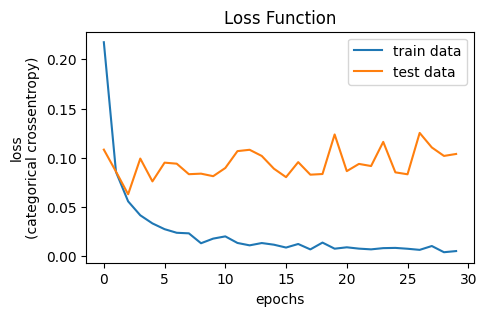

In [84]:
plt.figure(figsize=(5, 3))
plt.plot(df['epoch'], df['loss'], label="train data")
plt.plot(df['epoch'], df['val_loss'], label="test data")
plt.xlabel("epochs")
plt.ylabel("loss\n(categorical crossentropy)")
plt.title('Loss Function')
plt.legend(loc="upper right")
plt.show()

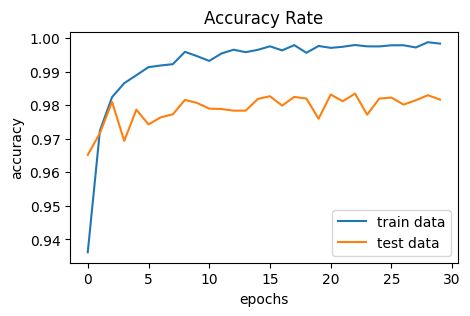

In [85]:
plt.figure(figsize=(5, 3))
plt.plot(df['epoch'], df['accuracy'], label="train data")
plt.plot(df['epoch'], df['val_accuracy'], label="test data")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Accuracy Rate')
plt.legend(loc="lower right")
plt.show()

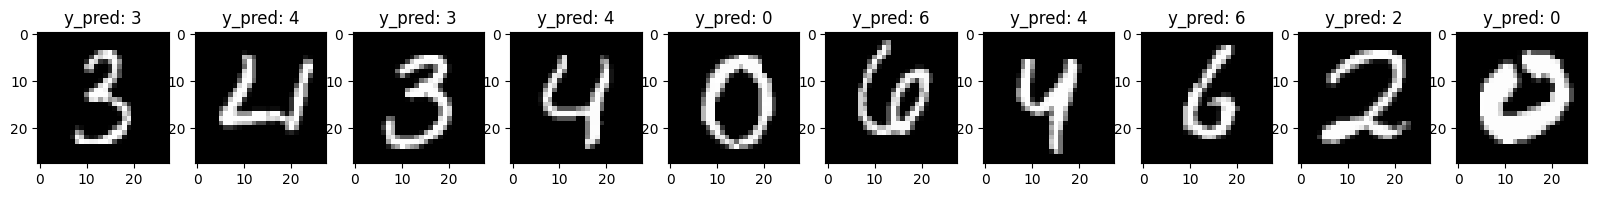

In [96]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in zip(np.random.randint(1, 100, 10), axs):
    y_pred = df_pred.iloc[i].idxmax()
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f'y_pred: {y_pred}')